<a href="https://colab.research.google.com/github/caiobellezi/estudos/blob/master/Estudos_GridSearch_Arvores_de_decisao_(Sonar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de decisão - Sonar


Ilustra o funcionamento do algoritmo de árvore de decisão com dados contínuos.

Exercicio proposto pelo: Prof. Hugo de Paula - PUC Minas

-------------------------------------------------------------------------------

### Base de dados: Sonar, Mines vs. Rocks

https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar,+Mines+vs.+Rocks%29

208 instâncias

60 atributos

2 classes (rocha, mina)

In [10]:
# instalando modulos necessarios para visualizacao da arvore de decisao
!pip install pydotplus -q
!pip install dtreeviz -q

In [11]:
#importar as bibliotacas e modulos necessarios

import pandas as pd
import numpy as np
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder


from google.colab import files
uploaded = files.upload()

Saving sonar.csv to sonar (3).csv


## Carregar base dados e particionar a base entre treinamento e teste

### Tranformacao de dados
A classe é convertida para labels únicos sequenciais.

`le = preprocessing.LabelEncoder()`

`le.fit(dados)`

In [12]:
#Carregar base de dados
sonar = pd.read_csv("sonar.csv", delimiter=";", decimal=',')
print("Dimensoes do dataset:", sonar.shape)
print("\nCampos:", sonar.columns)


#Particionar base de dados

X= sonar.iloc[:,:-1]
y = sonar.iloc[:,-1]

#Aplicar LabelEncoder para a classe alvo
le = LabelEncoder()
y = le.fit_transform(y)
#0 = Mina
#1 = rocha


#Particionamento da base

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
print("\nDimensoes X_train:", X_train.shape)
print("\nDimensoes X_test:", X_test.shape)
print("\nDimensoes y_train:", y_train.shape)
print("\nDimensoes y_test:", y_test.shape)

Dimensoes do dataset: (208, 61)

Campos: Index(['Atributo_1', 'Atributo_2', 'Atributo_3', 'Atributo_4', 'Atributo_5',
       'Atributo_6', 'Atributo_7', 'Atributo_8', 'Atributo_9', 'Atributo_10',
       'Atributo_11', 'Atributo_12', 'Atributo_13', 'Atributo_14',
       'Atributo_15', 'Atributo_16', 'Atributo_17', 'Atributo_18',
       'Atributo_19', 'Atributo_20', 'Atributo_21', 'Atributo_22',
       'Atributo_23', 'Atributo_24', 'Atributo_25', 'Atributo_26',
       'Atributo_27', 'Atributo_28', 'Atributo_29', 'Atributo_30',
       'Atributo_31', 'Atributo_32', 'Atributo_33', 'Atributo_34',
       'Atributo_35', 'Atributo_36', 'Atributo_37', 'Atributo_38',
       'Atributo_39', 'Atributo_40', 'Atributo_41', 'Atributo_42',
       'Atributo_43', 'Atributo_44', 'Atributo_45', 'Atributo_46',
       'Atributo_47', 'Atributo_48', 'Atributo_49', 'Atributo_50',
       'Atributo_51', 'Atributo_52', 'Atributo_53', 'Atributo_54',
       'Atributo_55', 'Atributo_56', 'Atributo_57', 'Atributo_58',


### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```

In [13]:
sonar_tree = DecisionTreeClassifier(random_state=0, criterion="entropy",)
sonar_tree = sonar_tree.fit(X_train, y_train)
print("Acurácia (treino): ", sonar_tree.score(X_train, y_train))

y_pred = sonar_tree.predict(X_test)
print("Acurácia (predict)", accuracy_score(y_test, y_pred))
print("\nClassification Report\n",classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (pred)", "Rocha(pred)"])
print("\nMatriz de confusao:\n",cnf_table)

Acurácia (treino):  1.0
Acurácia (predict) 0.7301587301587301

Classification Report
               precision    recall  f1-score   support

        Mina       0.77      0.71      0.74        34
       Rocha       0.69      0.76      0.72        29

    accuracy                           0.73        63
   macro avg       0.73      0.73      0.73        63
weighted avg       0.73      0.73      0.73        63


Matriz de confusao:
        Mina (pred)  Rocha(pred)
Mina            24           10
Rocha            7           22


## Utilizacao de *GridSearch* para melhoria do modelo
Escolher os parametros que serao avaliados, no caso a reposta serve como um direcional para escolha dos melhores parametros, ao analisar posteriormente vemos que o *score* fica melhor do que o seguido pelo GridSearch


In [16]:
params = {"criterion":[ "gini", "entropy"], 
          "min_samples_leaf":[2, 3],
          "max_depth":[1, 2, 3, 4, 5],
          "min_impurity_decrease" : [0.05, 0.5, 0.01]
          }
sonar_grid = GridSearchCV(sonar_tree, param_grid=params)
y_pred_grid = sonar_grid.fit(X_train, y_train)
y_pred_grid = y_pred_grid.predict(X_test)
print("Acurácia (treino - Grid): ", sonar_tree.score(X_train, y_train))
print("Acurácia (predict - Grid)", accuracy_score(y_test, y_pred_grid))
print(sonar_grid.best_params_,"\n")

print("\nClassification Report\n",classification_report(y_test, y_pred_grid, target_names=["Mina", "Rocha"]))

cnf_matrix_grid = confusion_matrix(y_test, y_pred_grid)
cnf_table_grid = pd.DataFrame(data=cnf_matrix_grid, index=["Mina", "Rocha"], columns=["Mina (pred)", "Rocha(pred)"])
print("\nMatriz de confusao:\n",cnf_table_grid)

Acurácia (treino - Grid):  0.8344827586206897
Acurácia (predict - Grid) 0.6984126984126984
{'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 3} 


Classification Report
               precision    recall  f1-score   support

        Mina       0.68      0.82      0.75        34
       Rocha       0.73      0.55      0.63        29

    accuracy                           0.70        63
   macro avg       0.71      0.69      0.69        63
weighted avg       0.70      0.70      0.69        63


Matriz de confusao:
        Mina (pred)  Rocha(pred)
Mina            28            6
Rocha           13           16


In [18]:
sonar_tree = DecisionTreeClassifier(random_state=0, criterion="gini", min_impurity_decrease=0.01, min_samples_leaf=3, max_depth=3)
sonar_tree = sonar_tree.fit(X_train, y_train)
print("Acurácia (treino): ", sonar_tree.score(X_train, y_train))

y_pred = sonar_tree.predict(X_test)
print("Acurácia (predict)", accuracy_score(y_test, y_pred))
print("\nClassification Report\n",classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (pred)", "Rocha(pred)"])
print("\nMatriz de confusao:\n",cnf_table)

Acurácia (treino):  0.903448275862069
Acurácia (predict) 0.6984126984126984

Classification Report
               precision    recall  f1-score   support

        Mina       0.68      0.82      0.75        34
       Rocha       0.73      0.55      0.63        29

    accuracy                           0.70        63
   macro avg       0.71      0.69      0.69        63
weighted avg       0.70      0.70      0.69        63


Matriz de confusao:
        Mina (pred)  Rocha(pred)
Mina            28            6
Rocha           13           16


## Importante

Se olharmos somente a acurárica, podemos ter a falsa impressao que o modelo sem os parametros estava melhor: 73,01% contra 69,84%.

Para este caso em especifico, importante olhar a matriz de confusao.

* No modelo anterior tinhamos (73,01% acurácia):
  * 34 **Minas** reais, onde foram previstas 24 corretamente e 10 foram identificadas como **Rocha**.
  * 7 **Rochas** que foram identificadas como **Mina** erroneamentes.

|  | Mina (prev) | Rocha (prev) | Total |
|--|--|--|--|
| Mina (real) | 24 | 10 | 34 |
| Rocha (real) | 7 | 22 | 29 |
|Total | 31 | 32 | 63 |

* No novo modelo (69,84% acurácia):
  * 34 **Minas** reais, onde foi previstas 28 corretamente e 6 foram identificadas como **Rocha**.
  * 13 **Rochas** que foram identificadas como **Mina** erroneamentes.

|  | Mina (prev) | Rocha (prev) | Total |
|--|--|--|--|
| Mina (real) | 28 | 6 | 34 |
| Rocha (real) | 13 | 16 | 29 |
|Total | 41 | 22 | 63 |


### Portanto
Para este caso em especifico, o segundo modelo é melhor empregado, pois é melhor ter um custo adicional indo até o local onde tem uma rocha onde se achava que era uma mina, do que deixar passar um mina que precisa ser desativa sem inspecao por classificar erroneamente como rocha.



## Visualizacao da árvore de decisao


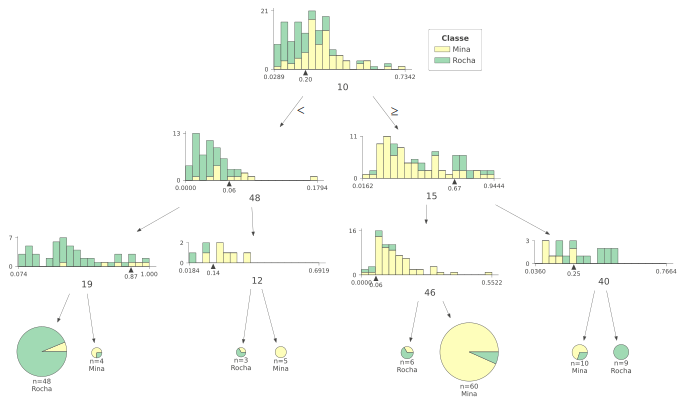

In [20]:
from dtreeviz.trees import *
viz = dtreeviz(sonar_tree,
               X_train,
               y_train,
               target_name="Classe",
               feature_names=np.arange(0,60),
               class_names=["Mina", "Rocha"])

viz

In [28]:
import pydotplus

dot_data = tree.export_graphviz(sonar_tree,
                                out_file=None,
                                rounded = True,
                                filled = True,
                                feature_names=np.arange(0,60),
                                class_names=["Mina","Rocha"])


graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_pdf("sonar.pdf")

True